# WeatherPy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?&appid=" + weather_api_key + "&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kahului
Processing Record 2 of Set 1 | kaitangata
Processing Record 3 of Set 1 | bijie
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | one hundred mile house
City not found. Skipping...
Processing Record 6 of Set 1 | fatehpur
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | makakilo city
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | turayf
Processing Record 14 of Set 1 | constitucion
Processing Record 15 of Set 1 | nanortalik
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | valparaiso
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | sao felix 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kahului,20.8947,-156.4700,26.65,78,20,5.81,US,1675453472
1,kaitangata,-46.2817,169.8464,17.50,93,21,1.24,NZ,1675453472
2,bijie,27.3125,105.2942,7.15,86,96,3.22,CN,1675453473
3,rikitea,-23.1203,-134.9692,25.74,72,99,3.36,PF,1675453473
4,fatehpur,25.9333,80.8000,12.54,53,5,2.90,IN,1675453474


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kahului,20.8947,-156.4700,26.65,78,20,5.81,US,1675453472
1,kaitangata,-46.2817,169.8464,17.50,93,21,1.24,NZ,1675453472
2,bijie,27.3125,105.2942,7.15,86,96,3.22,CN,1675453473
3,rikitea,-23.1203,-134.9692,25.74,72,99,3.36,PF,1675453473
4,fatehpur,25.9333,80.8000,12.54,53,5,2.90,IN,1675453474


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

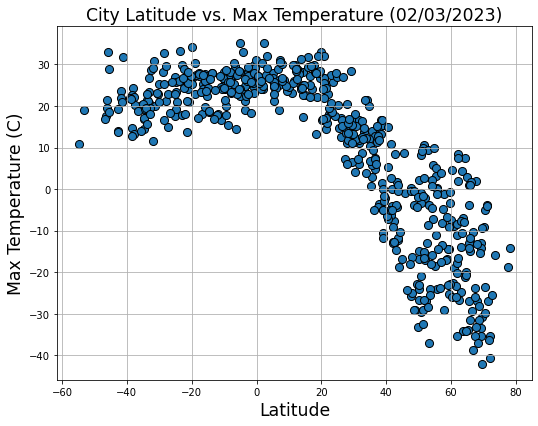

In [12]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=[8.5,6.5])
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", s=65)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (02/03/2023)", fontsize="xx-large")
plt.xlabel("Latitude", fontsize="xx-large")
plt.ylabel("Max Temperature (C)", fontsize="xx-large")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

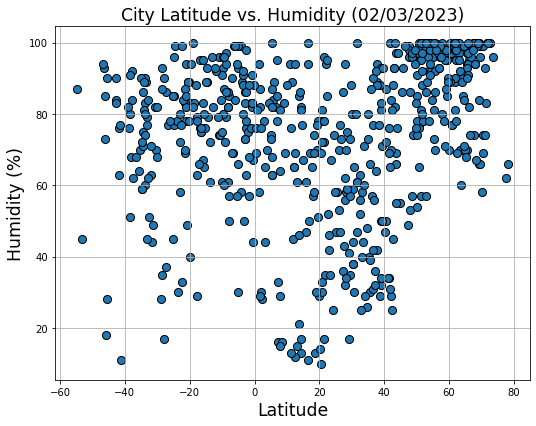

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=[8.5,6.5])
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", s=65)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (02/03/2023)", fontsize="xx-large")
plt.xlabel("Latitude", fontsize="xx-large")
plt.ylabel("Humidity (%)", fontsize="xx-large")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

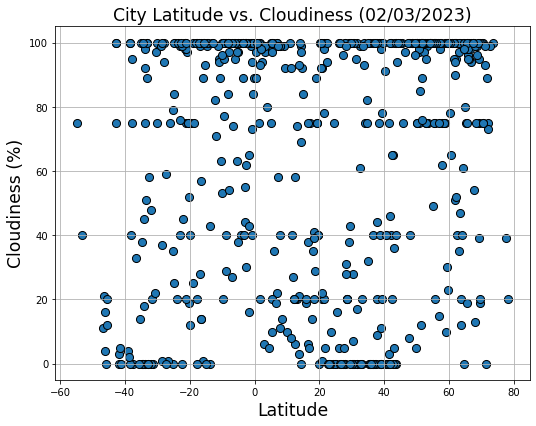

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=[8.5,6.5])
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", s=65)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (02/03/2023)", fontsize="xx-large")
plt.xlabel("Latitude", fontsize="xx-large")
plt.ylabel("Cloudiness (%)", fontsize="xx-large")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

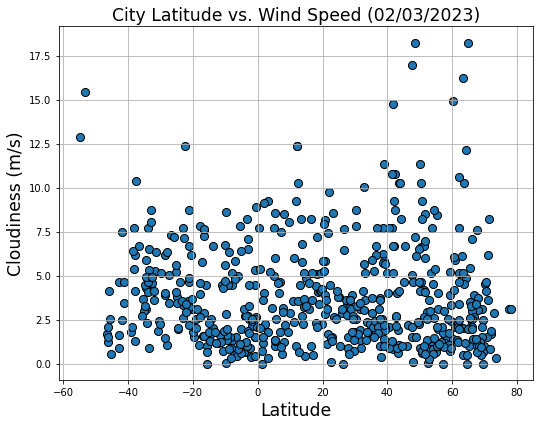

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=[8.5,6.5])
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", s=65)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (02/03/2023)", fontsize="xx-large")
plt.xlabel("Latitude", fontsize="xx-large")
plt.ylabel("Cloudiness (m/s)", fontsize="xx-large")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0, :])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kahului,20.8947,-156.4700,26.65,78,20,5.81,US,1675453472
2,bijie,27.3125,105.2942,7.15,86,96,3.22,CN,1675453473
4,fatehpur,25.9333,80.8000,12.54,53,5,2.90,IN,1675453474
5,albany,42.6001,-73.9662,-12.81,45,65,2.68,US,1675453174
7,makakilo city,21.3469,-158.0858,25.34,72,20,3.09,US,1675453475


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0, :])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kaitangata,-46.2817,169.8464,17.50,93,21,1.24,NZ,1675453472
3,rikitea,-23.1203,-134.9692,25.74,72,99,3.36,PF,1675453473
6,bambous virieux,-20.3428,57.7575,26.14,89,75,3.09,MU,1675453232
8,mar del plata,-38.0023,-57.5575,24.35,68,40,6.17,AR,1675453475
11,constitucion,-35.3333,-72.4167,20.33,70,14,3.65,CL,1675453476


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.74.


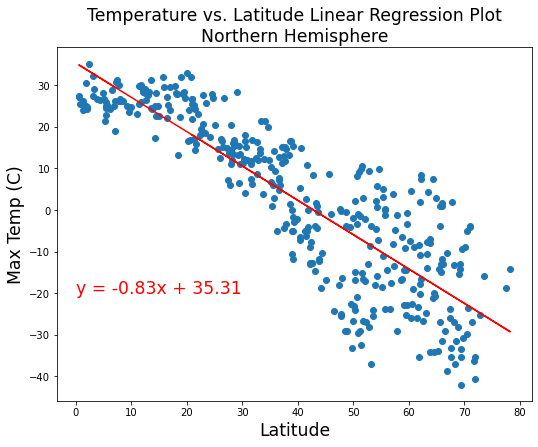

In [33]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=[8.5,6.5])
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize='xx-large',color="red")
plt.title("""Temperature vs. Latitude Linear Regression Plot
Northern Hemisphere""", fontsize="xx-large")
plt.xlabel("Latitude", fontsize="xx-large")
plt.ylabel("Max Temp (C)", fontsize="xx-large")
print(f"The r-value is: {round((rvalue**2),2)}.")
plt.show()

The r-value is: 0.17.


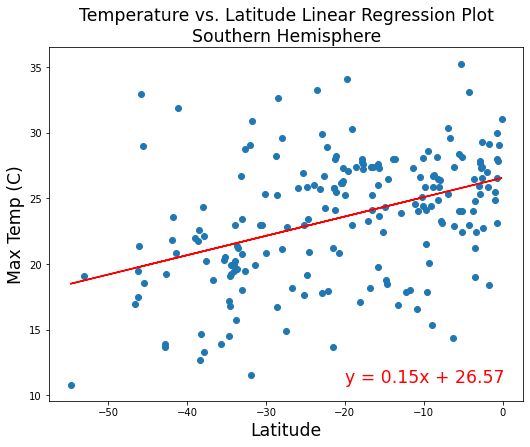

In [41]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=[8.5,6.5])
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,11),fontsize='xx-large',color="red")
plt.title("""Temperature vs. Latitude Linear Regression Plot
Southern Hemisphere""", fontsize="xx-large")
plt.xlabel("Latitude", fontsize="xx-large")
plt.ylabel("Max Temp (C)", fontsize="xx-large")
print(f"The r-value is: {round((rvalue**2),2)}.")
plt.show()

**Discussion about the linear relationship:**
Based on the above data, there is a difference between the Northern Hemisphere and the Southern Hemisphere. In the Northern Hemisphere, temperature and latitude are highly correlated. In other words, in the Northern Hemisphere, one can reasonably predict that the farther one is from the equator, the colder the temperature will be. In the Southern Hemisphere, temperature and latitude are weakly correlated.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.22.


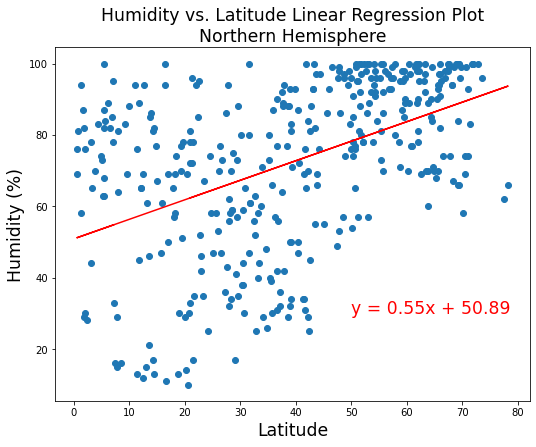

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=[8.5,6.5])
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize='xx-large',color="red")
plt.title("""Humidity vs. Latitude Linear Regression Plot
Northern Hemisphere""", fontsize="xx-large")
plt.xlabel("Latitude", fontsize="xx-large")
plt.ylabel("Humidity (%)", fontsize="xx-large")
print(f"The r-value is: {round((rvalue**2),2)}.")
plt.show()

The r-value is: 0.04.


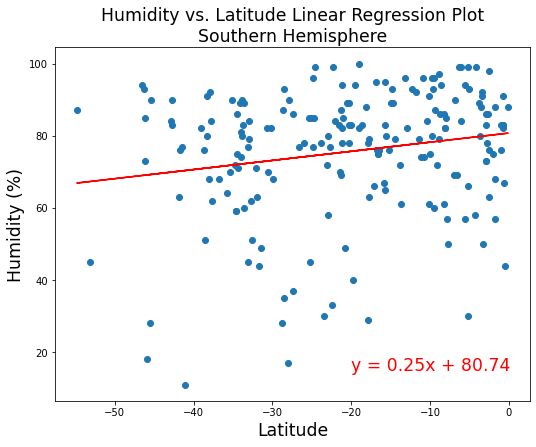

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=[8.5,6.5])
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,15),fontsize='xx-large',color="red")
plt.title("""Humidity vs. Latitude Linear Regression Plot
Southern Hemisphere""", fontsize="xx-large")
plt.xlabel("Latitude", fontsize="xx-large")
plt.ylabel("Humidity (%)", fontsize="xx-large")
print(f"The r-value is: {round((rvalue**2),2)}.")
plt.show()

**Discussion about the linear relationship:** Based on the above data, the humidity and latitutde are weakly correlated in the Northern Hemisphere and have almost zero correlation in the Southern Hemisphere. One should not predict humidity based on distance from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06.


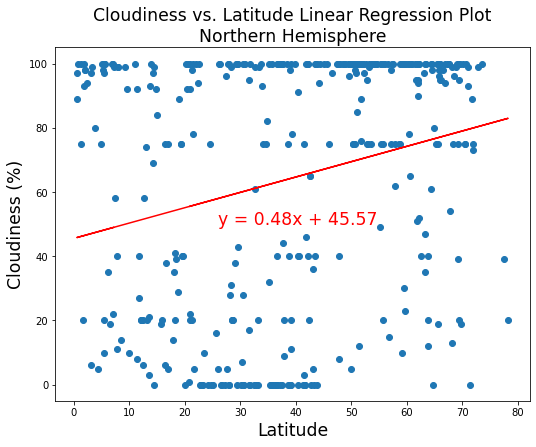

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=[8.5,6.5])
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,50),fontsize='xx-large',color="red")
plt.title("""Cloudiness vs. Latitude Linear Regression Plot
Northern Hemisphere""", fontsize="xx-large")
plt.xlabel("Latitude", fontsize="xx-large")
plt.ylabel("Cloudiness (%)", fontsize="xx-large")
print(f"The r-value is: {round((rvalue**2),2)}.")
plt.show()

The r-value is: 0.18.


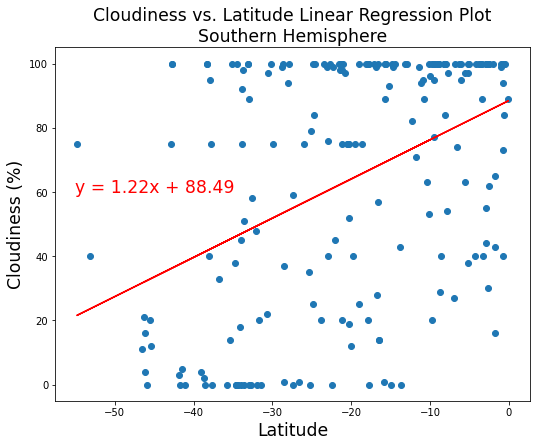

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=[8.5,6.5])
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize='xx-large',color="red")
plt.title("""Cloudiness vs. Latitude Linear Regression Plot
Southern Hemisphere""", fontsize="xx-large")
plt.xlabel("Latitude", fontsize="xx-large")
plt.ylabel("Cloudiness (%)", fontsize="xx-large")
print(f"The r-value is: {round((rvalue**2),2)}.")
plt.show()

**Discussion about the linear relationship:** Based on the above data, there is almost zero correlation between cloudiness and latitude in the Northern Hemisphere and a weak correlation between the two in the Southern Hemisphere. One should not predict cloudiness based on distance from the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0.


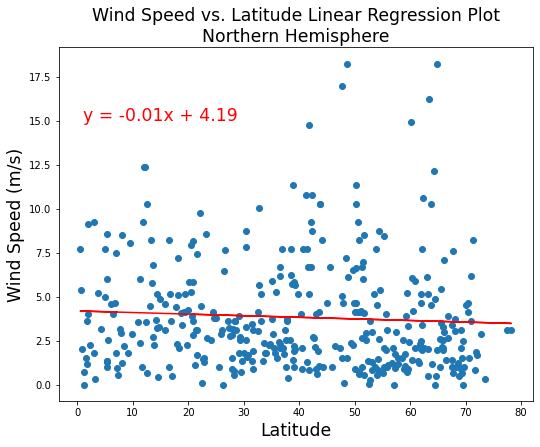

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=[8.5,6.5])
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,15),fontsize='xx-large',color="red")
plt.title("""Wind Speed vs. Latitude Linear Regression Plot
Northern Hemisphere""", fontsize="xx-large")
plt.xlabel("Latitude", fontsize="xx-large")
plt.ylabel("Wind Speed (m/s)", fontsize="xx-large")
print(f"The r-value is: {round((rvalue**2),2)}.")
plt.show()

The r-value is: 0.08.


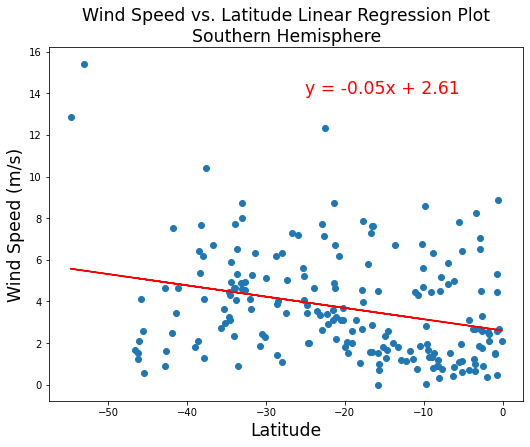

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=[8.5,6.5])
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,14),fontsize='xx-large',color="red")
plt.title("""Wind Speed vs. Latitude Linear Regression Plot
Southern Hemisphere""", fontsize="xx-large")
plt.xlabel("Latitude", fontsize="xx-large")
plt.ylabel("Wind Speed (m/s)", fontsize="xx-large")
print(f"The r-value is: {round((rvalue**2),2)}.")
plt.show()

**Discussion about the linear relationship:** Based on the above data, there is zero correlation between wind speed and latitude in the Northern Hemisphere and almost zero correlation between the two in the Southern Hemisphere. One should not predict wind speed based on distance from the equator.